#K-평균 군집화
##- 비지도 학습의 대표적인 알고리즘
##- 목표 변수가 없는 상태에서 데이터를 비슷한 유형끼리 묶어내는 머신러닝 기법
##- K-최근접 이웃 알고리즘과 비슷하게 거리 기반으로 작동하며 적절한 K값을 사용자가 지정해야 함
##- 거리 기반으로 작동하기 때문에 데이터 위치가 가까운 데이터끼리 한 그룹으로 묶음
##- 어때 전체 그룹의 수는 사용자가 지정한 K개임

##1. 중심점 K개를 임의로 설정
##2. 각 중심점을 기준으로 가까이에 있는 데이터들을 해당 클러스터로 할당
##3. 더 이상 클러스터에 변동이 없을 때까지 이 과정 반복
##4. 각 클러스터에 속한 데이터의 중점을 재계산하여 X의 위치를 움직임
##5. 이동한 중점을 기준으로 하여 중점과 데이터 간의 거리를 재계산하고, 중점과 가까운 쪽으로 클러스터를 재정의
##6. 더 이상 클러스터에 변동이 없을 때까지 이 과정 반복

#장점
##1. 구현이 비교적 간단함
##2. 클러스터링 결과를 쉽게 해석할 수 있음

#단점
##1. 최적의 K값을 자동으로 찾지 못하고, 사용자가 직접 선택해야 함
##2. 거리 기반 알고리즘 : 변수의 스케일에 따라 다른 결과를 나타낼 수 있음





#K-평균 군집화
##- 데이터를 거리 기반으로 측정하여 가까이 있는 데이터들을 하나로 묶어주는 방법
##- 예측하려는 종속변수가 존재하지 않을 때 사용하는 비지도 학습의 대표적인 알고리즘

#1단계 문제정의
#2단계 K-평균 군집화 맛보기
##ㄴ라이브러리 및 데이터 불러오기
##ㄴ연습용 데이터 모델링 및 평가
##ㄴ 엘보우 기법으로 최적의 K값 구하기
#3단계 데이터 불러오기 및 데이터 확인하기
#4단계 전처리 : 피처 엔지니어링
#5단계 고객 데이터 모델링 및 실루엣 개수
#6단계 최종 예측 모델 및 결과 해석



#예측목표 : 데이터들을 비슷한 속성끼리 뷴류하라
#알고리즘 : K-평균 군집화(K-Means Clustering)
#종속변수 : selling_price(판매 가격)
#평가지표 : 엘보우 기법, 실루엣 점수
#사용한 모델 : KMeans

In [2]:
import kagglehub
import pandas as pd
import os

# 1. 데이터셋 다운로드
path = kagglehub.dataset_download("saquib7hussain/k-mean-cluster-dataset")

# 2. 다운로드된 경로 확인
print("Path to dataset files:", path)

# 3. 파일 목록 확인
print("Files in directory:", os.listdir(path))

100%|██████████| 9.73k/9.73k [00:00<00:00, 7.72MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/saquib7hussain/k-mean-cluster-dataset/versions/1
Files in directory: ['cluster_data.csv']


In [3]:
# 4. CSV 파일 읽기
csv_file = os.path.join(path, "cluster_data.csv")
df = pd.read_csv(csv_file, encoding='latin1')

# 5. 데이터 출력
print(df.head())

   Feature 1  Feature 2
0   2.698582  -0.672960
1  -0.128113   4.355952
2   2.509049   5.773146
3  -1.518276   3.444886
4  -0.072283   2.883769


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data= df.copy()
data.rename(columns = {'Feature 1':'var_1','Feature 2':'var_2'}, inplace = True)
#df.columns = ['var_1', 'var_2']

In [6]:
data.head()

,var_1,var_2
0,2.698582,-0.672960
1,-0.128113,4.355952
2,2.509049,5.773146
3,-1.518276,3.444886
4,-0.072283,2.883769


<Axes: xlabel='var_1', ylabel='var_2'>

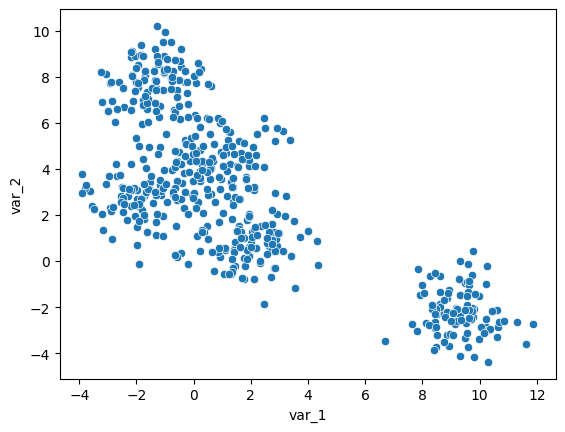

In [7]:
sns.scatterplot(data, x='var_1', y='var_2')
#교수님 데이터와 다르지만 그룹이 보이긴 한다..

In [8]:
from sklearn.cluster import KMeans

In [9]:
kmeans_model = KMeans(n_clusters=4 ,random_state = 100)#군집의 개수 : 4개로 설정..

In [10]:
kmeans_model.fit(data)

KMeans(n_clusters=4, random_state=100)

In [11]:
kmeans_model.predict(data)#각 데이터 값이 4개중 몇 번의 군집인지(0,1,2,3 군집 중에서)

array([3, 2, 2, 2, 2, 1, 2, 1, 3, 3, 0, 2, 2, 0, 2, 1, 2, 1, 2, 2, 3, 1,
       3, 2, 3, 0, 3, 3, 0, 2, 3, 2, 2, 0, 2, 3, 3, 1, 1, 1, 0, 1, 2, 3,
       2, 2, 1, 2, 3, 0, 2, 1, 3, 3, 1, 2, 1, 1, 0, 2, 3, 1, 3, 2, 2, 0,
       2, 0, 2, 2, 2, 3, 2, 1, 2, 2, 3, 3, 2, 3, 2, 0, 0, 2, 1, 3, 1, 2,
       2, 2, 2, 0, 0, 2, 1, 3, 3, 2, 0, 2, 3, 2, 0, 3, 2, 2, 1, 3, 3, 2,
       2, 2, 3, 1, 1, 0, 0, 0, 3, 1, 1, 2, 2, 0, 2, 2, 1, 2, 0, 0, 0, 3,
       2, 1, 0, 1, 1, 1, 2, 2, 3, 0, 3, 2, 3, 1, 1, 0, 2, 2, 2, 0, 0, 3,
       2, 0, 3, 2, 0, 2, 0, 1, 2, 2, 3, 3, 2, 3, 1, 3, 2, 2, 1, 1, 3, 0,
       2, 0, 2, 0, 2, 0, 0, 1, 2, 1, 3, 2, 0, 1, 0, 3, 1, 2, 3, 2, 2, 1,
       0, 0, 3, 0, 2, 0, 0, 3, 1, 2, 2, 2, 1, 0, 2, 0, 1, 0, 1, 3, 3, 3,
       3, 2, 1, 1, 1, 2, 2, 1, 1, 2, 3, 2, 0, 0, 0, 2, 0, 2, 1, 2, 3, 2,
       0, 1, 3, 3, 0, 0, 3, 1, 1, 2, 3, 3, 2, 2, 3, 2, 2, 0, 1, 2, 0, 3,
       2, 2, 1, 3, 2, 3, 2, 0, 2, 3, 0, 3, 0, 3, 0, 0, 2, 3, 3, 3, 2, 3,
       0, 2, 0, 1, 2, 3, 0, 2, 3, 1, 0, 2, 1, 0, 1,

In [12]:
data['label'] = kmeans_model.predict(data)

<Axes: xlabel='var_1', ylabel='var_2'>

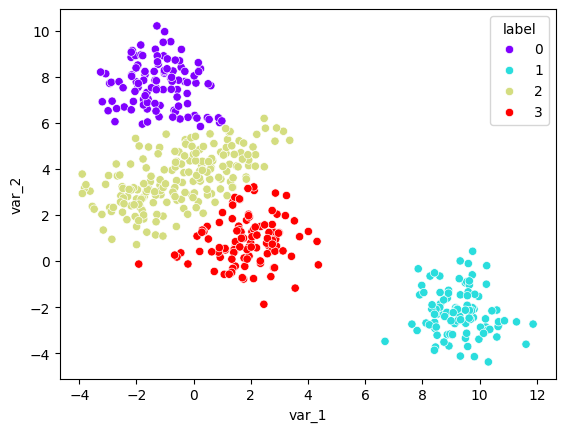

In [13]:
sns.scatterplot(x = data['var_1'], y = data['var_2'], hue = data['label'], palette='rainbow')

In [14]:
kmeans_model_new = KMeans(n_clusters=3, random_state = 100)#군집의 개수 3개로 변경

In [15]:
kmeans_model_new.fit(data)

KMeans(n_clusters=3, random_state=100)

In [16]:
data_new = data.copy()

In [17]:
data_new['label'] = kmeans_model_new.predict(data)

In [18]:
data_new.head()

,var_1,var_2,label
0,2.698582,-0.672960,2
1,-0.128113,4.355952,2
2,2.509049,5.773146,2
3,-1.518276,3.444886,2
4,-0.072283,2.883769,2


<Axes: xlabel='var_1', ylabel='var_2'>

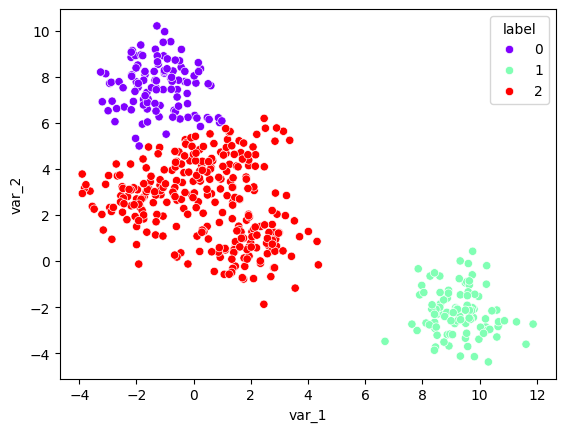

In [19]:
sns.scatterplot(data = data_new, x = 'var_1', y = 'var_2', hue = 'label', palette='rainbow')

#이너셔(Inertia)
##- 각 샘플과 가장 가까운 군집 준심 사이의 평균 제곱 거리를 측정한 수치
##- k값에 따라 결과가 바뀐다 -> k를 객관적으로 선택하기 위한 수치
##- 클러스터 개수 k, 샘플의 개수 n, 샘플의 위치, j번째 군집 중심, 거리 함수

In [20]:
kmeans_model.inertia_
#이게 무슨 뜻인데?

1351.7375876504575

In [21]:
temp_model = KMeans(n_clusters=500, random_state = 100)
temp_model.fit(data)
temp_model.inertia_
#데이터 수가 500개 이기 때문에 이너샤 값은 0이 나온다 -> 500개의 데이터 각각을 군집 분류했다는 뜻
#이너샤 값이 낮을수록 좋은 군집 분류라고 한다.
#클러스터 중심과 데이터 간 거리를 표현한 것이기 때문..
#군집 분류가 잘 되었다 == 데이터들이 모여있음 == 클러스터 중심과 데이터 간 거리가 짧다

0.0

In [22]:
#군집 분류는 데이터의 집단적인 특성을 보기 위해 하는 것.
#군집의 수가 너무 많으면(k값이 너무 크면) 군집 분류의 장점이 없어진다
#군집의 수는 얼마가 적절한가?


In [23]:
distance = []
for k in range(2,10):
  k_model = KMeans(n_clusters=k)
  k_model.fit(data)
  distance.append(k_model.inertia_)

In [24]:
distance

[4897.370235747452,
 2298.817929904161,
 1351.656653132092,
 906.183172935401,
 831.8841468557101,
 737.1129681269678,
 726.9786512633988,
 618.1579706605822]

<Axes: >

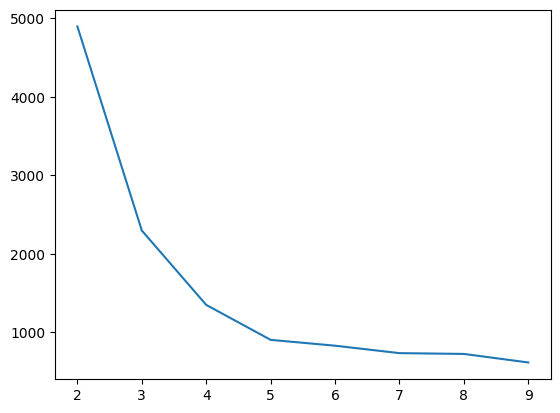

In [25]:
sns.lineplot(x=range(2,10),y=distance)
#이너샤 값이 작을수록 군집 분류가 잘 되었다고 판단..
#하지만 군집의 수가 많아질수록 집단적 특징을 너무 많이 판단해야할 수 있다.
#그래프에서 볼 수 있듯이 k값이 6~9일 때는 이너샤 값의 차이가 크지 않다
#이너샤 값이 급격하게 낮아지는 구간은 k = 2, k = 3, k = 4일 때로 보인다.
#군집 분류가 급격하게 의미있게 좋아지는 군집의 수 : k = 4

In [26]:
# 1. 데이터셋 다운로드
path = kagglehub.dataset_download("priyamchoksi/credit-card-transactions-dataset")

# 2. 다운로드된 경로 확인
print("Path to dataset files:", path)

# 3. 파일 목록 확인
print("Files in directory:", os.listdir(path))

100%|██████████| 145M/145M [00:01<00:00, 105MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/priyamchoksi/credit-card-transactions-dataset/versions/1
Files in directory: ['credit_card_transactions.csv']


In [27]:
# 4. CSV 파일 읽기
csv_file = os.path.join(path, "credit_card_transactions.csv")
customer = pd.read_csv(csv_file, encoding='latin1')

# 5. 데이터 출력
print(customer.head())

   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      long city_pop  \
0    Banks      F                561 Perry Cove  ...  -81.1781     3495   
1     Gill      F  43039 Riley Greens Suite 393  ... -11

In [28]:
customer = customer[['cc_num','category','amt']]#카드 번호, 범주, 가격
customer.head()

,cc_num,category,amt
0,2703186189652095,misc_net,4.97
1,630423337322,grocery_pos,107.23
2,38859492057661,entertainment,220.11
3,3534093764340240,gas_transport,45.00
4,375534208663984,misc_pos,41.96


In [29]:
customer['cc_num'].nunique()#카드가 983장..

983

In [30]:
customer['category'].nunique()

14

In [31]:
#피처엔지니어링
customer_dummy = pd.get_dummies(customer, columns = ['category'], dtype = int)
customer_dummy

,cc_num,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2703186189652095,4.97,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,630423337322,107.23,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,38859492057661,220.11,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3534093764340240,45.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,375534208663984,41.96,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,30263540414123,15.56,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1296671,6011149206456997,51.70,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1296672,3514865930894695,105.93,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1296673,2720012583106919,74.90,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
cat_list = customer_dummy.columns[2:]

In [33]:
for i in cat_list:#카테고리 별 사용 금액
  customer_dummy[i] = customer_dummy[i] * customer_dummy['amt']

In [34]:
customer_dummy

,cc_num,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2703186189652095,4.97,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,4.97,0.00,0.0,0.0,0.0,0.0
1,630423337322,107.23,0.00,0.00,0.0,0.0,107.23,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0
2,38859492057661,220.11,220.11,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0
3,3534093764340240,45.00,0.00,0.00,45.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0
4,375534208663984,41.96,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,41.96,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,30263540414123,15.56,15.56,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0
1296671,6011149206456997,51.70,0.00,51.70,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0
1296672,3514865930894695,105.93,0.00,105.93,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0
1296673,2720012583106919,74.90,0.00,74.90,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0


In [35]:
customer_agg = customer_dummy.groupby('cc_num').sum()
customer_agg.head()

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
cc_num,,,,,,,,,,,,,,,
60416207185,85043.47,5327.22,2353.95,13221.64,2670.81,14646.56,4241.94,7604.69,6671.92,3020.70,4838.97,5629.21,3515.72,10893.96,406.18
60422928733,105640.20,6857.47,9870.48,10121.71,2407.72,14740.06,4687.39,10213.69,11821.96,4037.81,6038.31,6036.51,9475.63,8832.35,499.11
60423098130,58673.63,2290.18,2248.67,3641.47,37.27,5335.87,1708.76,1854.30,2741.89,1471.80,1141.46,2061.65,5262.95,1629.83,27247.53
60427851591,59129.61,2985.29,1528.00,2081.52,1142.46,7818.85,2550.97,4798.08,2242.31,4213.20,1635.23,1553.62,9500.07,6355.39,10724.62
60487002085,25160.11,1495.84,1884.46,3637.95,1009.63,4028.14,2270.87,2191.04,2641.24,192.06,2900.79,817.60,557.37,1444.32,88.80


In [36]:
#변수별로 얼마나 군집의 중심에서 가까이 위치해 있는가
#변수별 수치 차이가 모두 다르다 -> 스케일링 필요
#거리 기반 모델은 변수의 스케일링이 필요하다
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(customer_agg), columns = customer_agg.columns, index = customer_agg.index)

In [37]:
scaled_df.head()

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
cc_num,,,,,,,,,,,,,,,
60416207185,-0.130243,-0.172762,-0.756343,0.744567,0.073404,-0.005352,-0.148410,0.062488,0.013911,-0.544351,-0.056423,0.392692,-0.813742,0.172587,-0.514937
60422928733,0.215604,0.152073,1.613114,0.256128,-0.028662,0.002424,-0.013943,0.594063,1.298609,-0.291017,0.206630,0.525925,0.108525,-0.077103,-0.503512
60423098130,-0.573028,-0.817450,-0.789530,-0.764928,-0.948273,-0.779684,-0.913096,-1.109134,-0.966451,-0.930139,-0.867401,-0.774309,-0.543366,-0.949429,2.784834
60427851591,-0.565372,-0.669896,-1.016709,-1.010721,-0.519517,-0.573185,-0.658860,-0.509349,-1.091073,-0.247332,-0.759102,-0.940493,0.112307,-0.377098,0.753572
60487002085,-1.135766,-0.986069,-0.904341,-0.765483,-0.571048,-0.888443,-0.743413,-1.040524,-0.991558,-1.248887,-0.481525,-1.181256,-1.271532,-0.971897,-0.553954


#이너셔
##- 각 클러스터의 중점과 그에 속한 데이터간의 거리, 값이 작을수록 잘 뭉쳐진 클러스터를 의미함

#실루엣 계수
##- 엘보우 기법과 같이 최적의 클러스터 수를 찾는 방법으로, 엘보우 기법에서 적절한 클러스터 수를 찾지 못했을 때 대안으로 사용할 수 있음
##- 엘보우 기법보다 계산 시간이 오래 걸리는 단점이 있음

#엘보우 기법
##- 최적의 클러스터 개수를 확인하는 방법
##- 클러스터의 중점과 각 데이터 간의 거리를 기반으로 계산함


#고객 데이터 모델링 및 실루엣 계수
##- 실루엣 계수는 클러스터 내부에서의 평균 거리와, 최근 접한 클러스터 데이터와의 평균 거리도 점수에 반영함
##- 실루엣 계수 = (b-a)/(max(a,b))
##- 실루엣 계수는 수가 클수록(차이가 클수록) 좋은 분류다

In [38]:
#이너셔 파악(군집의 개수 결정)
distance = []
for k in range(2,10):
  k_model = KMeans(n_clusters=k)
  k_model.fit(scaled_df)
  distance.append(k_model.inertia_)

<Axes: >

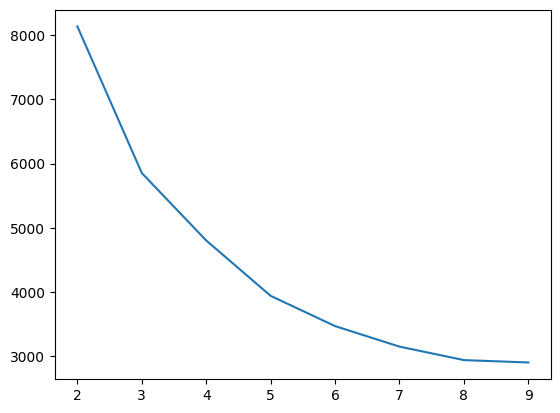

In [39]:
sns.lineplot(x=range(2,10),y=distance)
#군집의 수가 많아질수록 작은 그룹으로 데이터가 나눠지기 때문에 이너셔 값이 작아질 수밖에 없다
#급격하게 줄어드는 지점이 있는지 확인
#판단하기 어렵다.. -> 적절한 군집의 수는 얼마인가? -> 실루엣 계수 계산

In [40]:
#실루엣 계수
from sklearn.metrics import silhouette_score

In [42]:
silhouette = []
#군집의 개수를 변화시켜가며 실루엣 계수 계산
for k in range(2,10):
  k_model = KMeans(n_clusters = k)
  k_model.fit(scaled_df)
  labels = k_model.predict(scaled_df)
  silhouette.append(silhouette_score(scaled_df, labels))

<Axes: >

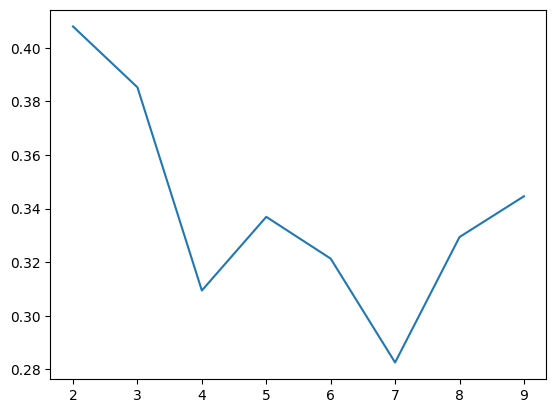

In [43]:
sns.lineplot(x=range(2,10),y=silhouette)
#실루엣 계수는 높을수록 좋은 분류..
#2개로 분류할 때 가장 좋음.. 그 다음은 3개?

In [45]:
#이너셔와 실루엣 계수를 봤을 때 군집의 수는 3개가 좋지 않을까?
#k=3은 silhouette가 높고 inertia도 크게 줄어든 균형점
k_model = KMeans(n_clusters = 3)
k_model.fit(scaled_df)
labels = k_model.predict(scaled_df)

In [46]:
scaled_df['label'] = labels

In [48]:
#군집이 어떤 기준으로 나눠졌는지는 잘 모르지만, 나눠진 그룹을 분석하여 판별할 수 있다.
scaled_df.head()

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,label
cc_num,,,,,,,,,,,,,,,,
60416207185,-0.130243,-0.172762,-0.756343,0.744567,0.073404,-0.005352,-0.148410,0.062488,0.013911,-0.544351,-0.056423,0.392692,-0.813742,0.172587,-0.514937,0
60422928733,0.215604,0.152073,1.613114,0.256128,-0.028662,0.002424,-0.013943,0.594063,1.298609,-0.291017,0.206630,0.525925,0.108525,-0.077103,-0.503512,0
60423098130,-0.573028,-0.817450,-0.789530,-0.764928,-0.948273,-0.779684,-0.913096,-1.109134,-0.966451,-0.930139,-0.867401,-0.774309,-0.543366,-0.949429,2.784834,2
60427851591,-0.565372,-0.669896,-1.016709,-1.010721,-0.519517,-0.573185,-0.658860,-0.509349,-1.091073,-0.247332,-0.759102,-0.940493,0.112307,-0.377098,0.753572,2
60487002085,-1.135766,-0.986069,-0.904341,-0.765483,-0.571048,-0.888443,-0.743413,-1.040524,-0.991558,-1.248887,-0.481525,-1.181256,-1.271532,-0.971897,-0.553954,2


In [49]:
scaled_df_mean = scaled_df.groupby('label').mean()#그룹별로 분석
scaled_df_count = scaled_df.groupby('label').count()['category_travel']#변수의 수가 필요한 것이기 때문에 어떤 변수가 와도 상관없다

In [50]:
scaled_df_count = scaled_df_count.rename('count')

In [51]:
scaled_df_all = scaled_df_mean.join(scaled_df_count)

In [52]:
#군집 분류를 통해 고객을 분류
scaled_df_all
#label 0 은 평균에 가까움
#label 1 은 평균보다 높음
#label 2 는 평균보다 작음

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,count
label,,,,,,,,,,,,,,,,
0,0.456853,0.334618,0.372227,0.725347,0.232071,0.304867,0.550088,0.524177,0.568127,0.334004,0.303352,0.473296,0.257390,0.216457,0.158475,428
1,2.157490,2.286149,1.857634,-0.140572,2.095450,2.082525,1.687814,1.653466,1.319131,1.731773,1.756223,1.723870,2.231288,2.431133,1.052196,88
2,-0.825251,-0.737468,-0.691189,-0.638283,-0.607550,-0.671832,-0.822196,-0.791976,-0.769255,-0.632441,-0.608956,-0.758611,-0.656352,-0.656496,-0.343513,467


#K-평균 군집화 실습

#1단계 문제정의
##- 임의로 만든 데이터셋을 활용해 K-평균 군집화의 개념 이해
##- K-평균 군집화 알고리즘을 사용해 카드 사용 고객의 소비형태에 따라 그룹을 나눔

#2단계 K-평균 군집화 맛보기
##ㄴ라이브러리 및 데이터 불러오기
##ㄴ연습용 데이터 모델링 및 평가
##ㄴ 엘보우 기법으로 최적의 K값 구하기
##- 연습용 데이터를 이용해 K-평균 군집화 알고리즘을 맛보기
##- 임의의 데이터셋을 사용함
##- K-평균 군집화 알고리즘으로 데이터를 3개 그룹으로 분류함
##- 산점도로 결과를 확인하여 기대한대로 분류함
##- 엘보우 기법을 사용하여 최적의 그룹수를 알아봄

#3단계 데이터 불러오기 및 데이터 확인하기
##- 고객 사용 이력 데이터셋을 사용

#4단계 전처리 : 피처 엔지니어링
##- 범주형 변수를 더비 변수로 변환해 각 범주별 사용 금액을 계산
##- 군집화 이전에 스케일 조정

#5단계 고객 데이터 모델링 및 실루엣 개수
##- 고객 데이터에서는 엘보우 기법으로 적절한 그룹수를 찾을 수 없었음
##- 실루엣 계수를 활용하여 최적의 그룹수를 찾음

#6단계 최종 예측 모델 및 결과 해석
##- 실루엣 계수를 통해 3개의 그룹이 최적임을 확인함
##- 고객들을 3그룹으로 분류하고 각각 어떤 특성이 있는지 확인함
